# In Class Activity - Sampling

```{note}
This exercise authored by [Todd M. Gureckis](http://gureckislab.org/~gureckis) is released under the [license](/LICENSE.html).
```

In the chapter and lecture we discussed some basic issues in sampling.  In this notebook you will explore some handy python methods for sampling and consider the implications of sampling on what you understand about some target group (i.e., what you can generalize).

## Importing and using existing functions

In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import seaborn as sns

## Problem 0: Seeding a random number generator

When we use the computer to play with random numbers (or random samples), we aren't actually using random numbers.  Generally speaking your computer is a deterministic machine so it is unable to make truely random numbers.  Intead the numbers your computer gives you are known as pseudo-random because they have many of the properties we want from random numbers but are not exactly and entirely random.

Anytime we use random numbers in a script, simulation, or analysis it is important to "seed" the random number generator.  This initialized the random number generator function to a particularly "state" and this makes the number in the script random but repeatable.  

Let's experiment with this.  First try running the following cell and seeing what the output is.  Try running it multiple times and seeing how the numbers change.

In [2]:
npr.randint(0,10,10)

array([4, 2, 2, 1, 4, 5, 7, 3, 2, 1])

Now run this cell:

In [3]:
npr.seed(10)
print(npr.randint(0,10,10))
print(npr.randint(0,10,10))

[9 4 0 1 9 0 1 8 9 0]
[8 6 4 3 0 4 6 8 1 8]


Again, try repeating the cell execution over and over.  What do you observe?

Try restarting the kernel and run the cell again.  What do you notice?  Compare to other people in your group.  Also change the argument to `npr.seed()` and see what happens.

#### Answer 0 here:

For each number given to `npr.seed()`, the random numbers generated are always the same, even across the sessions and machines. It's a good way for people to replicate the results even the numbers used are supposed to be "random".

Bottom line:  Always seed the random number generator at the start of any script that uses random numbers so your code is more repeatable.

## Problem 1: Sampling from a finite population

Imagine I create a list with 100 randomly determined values as below.  Using the web, research the the numpy random `choice()` function.  Use it generate a random sample of size 10 from this data.  Do it twice one with replacement and once without replacement.

In [4]:
my_data = np.array([75, 25, 59, 63, 48, 29,  3, 17, 68, 39,  9, 62, 61, 52, 64, 45, 90,
       87,  0, 42, 26, 52, 22, 25, 20, 22, 81, 25, 48, 79, 37,  6, 33, 30,
       81,  5, 37, 85, 65,  0, 27, 40, 96, 67, 77, 29, 32, 25,  4, 53, 46,
        7, 51, 65, 46, 91, 60, 52, 93, 26,  2, 42, 18, 19, 97, 45, 78, 33,
       25, 30, 97, 96, 99, 32, 86, 43, 81, 83, 51, 81, 36, 29,  2, 33, 95,
       39, 79,  1, 80, 17, 50, 38,  1, 98, 30, 89, 93, 27, 43, 30])

#### Answer 1 here:

In [5]:
npr.choice(my_data, size=10, replace=True)

array([51, 53,  7, 46, 83, 30, 52, 22, 52,  1])

In [6]:
npr.choice(my_data, size=10, replace=False)

array([43, 97, 40, 52, 68, 97, 38, 26, 81, 27])

## Problem 2: Sampling from a data frame

Sometimes what we are interested in is sampling from a pandas dataframe rather than a list or numpy array.  Why might we want to sample from a dataset?  One is to randomly select subset of test-training if we are doing machine learning projects on the data (we'll talk about this later).  Another is if there are two many records to analyze so it makes sense to randomly select a subset and analyze those.  Another is to repeatedly sample over and over again from a dataset to do a statistical method called "boostrapping" (https://en.wikipedia.org/wiki/Bootstrapping_(statistics))

This code loads an example pandas dataset of different penguins.  

In [7]:
penguins_df = sns.load_dataset('penguins')

In [8]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Research the pandas `sample()` method and randomly sample 20 penguins from the dataframe.

#### Answer 2a here:

In [10]:
penguins_df.sample(n=20, replace=False, random_state=10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
229,Gentoo,Biscoe,46.8,15.4,215.0,5150.0,Male
80,Adelie,Torgersen,34.6,17.2,189.0,3200.0,Female
327,Gentoo,Biscoe,53.4,15.8,219.0,5500.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
309,Gentoo,Biscoe,52.1,17.0,230.0,5550.0,Male
300,Gentoo,Biscoe,49.1,14.5,212.0,4625.0,Female
113,Adelie,Biscoe,42.2,19.5,197.0,4275.0,Male
217,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,Female
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female


Now, for part b of this question, in a for loop, 100 times create a random sample of the dataframe and compute the mean body mass of the penguins in your sample.  Append all these values to a list and then plot a histogram of these values.  Compare it to the mean of the dataset containing all the penguins.

#### Answer 2b here:

<AxesSubplot:ylabel='Count'>

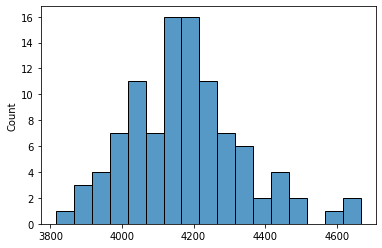

In [11]:
mean_mass = [penguins_df.sample(n=20)['body_mass_g'].mean() for i in range(100)]
sns.histplot(mean_mass, binwidth=50)

In [12]:
penguins_df['body_mass_g'].mean()

4201.754385964912

We can see that the results are nearly identical due to CLT. We can also try 1000 trials to see even stronger effects.

<AxesSubplot:ylabel='Count'>

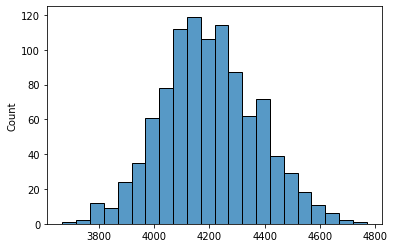

In [13]:
sns.histplot([penguins_df.sample(n=20)['body_mass_g'].mean() for i in range(1000)], binwidth=50)

## Problem 3: Stratified sampling

One problem with the simple random samples we made of the penguins is that in each sample we might exclude some important groups of the data.  For example, if we only sampled 10 penguins perhaps all of them are male.  If we wanted to be more even handed name make sure our samples were _representative_ of the sex differences then we might want to sample from the subpopulations.  This is called "stratified sampling".

Please read this example webpage: https://www.statology.org/stratified-sampling-pandas/
on stratified sampling and adapt the code to generate a random sample of 10 penguins that is stratified so that there are 5 male and 5 female examples in the sample

#### Problem 3: Answer here

In [14]:
penguins_df.groupby('sex', group_keys=False).apply(lambda x: x.sample(5))

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
89,Adelie,Dream,38.9,18.8,190.0,3600.0,Female
265,Gentoo,Biscoe,43.6,13.9,217.0,4900.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
242,Gentoo,Biscoe,46.5,14.5,213.0,4400.0,Female
132,Adelie,Dream,36.8,18.5,193.0,3500.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
281,Gentoo,Biscoe,46.2,14.9,221.0,5300.0,Male
192,Chinstrap,Dream,49.0,19.5,210.0,3950.0,Male
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
311,Gentoo,Biscoe,52.2,17.1,228.0,5400.0,Male
